<a href="https://colab.research.google.com/github/JonesKwameOsei/Dissertation/blob/main/CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**
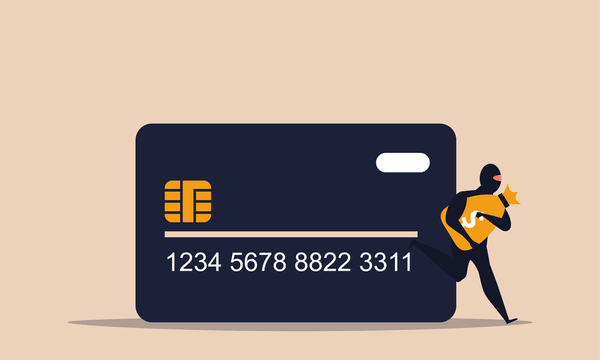

[Image download here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fpngtree.com%2Ffree-png-vectors%2Fcredit-card-fraud&psig=AOvVaw25A2tFBaC5rqJH97oX3Db0&ust=1681215910933000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCPCDxsqon_4CFQAAAAAdAAAAABAE)


In this Project, We are going to build **a model** to detect credit card fraud as well as **evaluate** the model with **the highest efficacy**. 

In [52]:
# Libraries for Data Wrangling and Manipulations  
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

# Libraries for plots and visualisations
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
import warnings

# Libraries for Machine Learning Models
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

sns.set()
py.offline.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

## Load our data set
The dataset was downloaded from Kaggle public datasets and link can be found [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

The dataset was uploaded from my goodgle drive using google colap's import package, google.colab (import drive).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
crecard_df = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')

## Basic Exploratory Data Analysis (BEDA)
In the analysis, we will explore our dataset to know more about it. This will help us know more about our data and what we will be working with.  This is because the analysis allows us to obtain a snipet of the characteristics of the data we are working with, including the number of observations, the type of variables and our data was distributed. Understanding these fundamentals about our data enables us as data scientists to make arrive at data driven recommendations to support data driven decision-making. 

### View the some records of our dataframe

In [54]:
print('Displaying the first ten records from the dataframe:')
crecard_df.head(10)


Displaying the first ten records from the dataframe:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [55]:
print('Displaying the last 10 records from the dataframe:')
crecard_df.tail(10)

Displaying the last 10 records from the dataframe:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Check the dimension of the dataframe

In [18]:
print('It displays the dimension of the dataframe:', crecard_df.ndim)

It displays the dimension of the dataframe: 2


### Check the number of number of Elements in the Dataset

In [41]:
print('This displays the total elements in the dataframe:', crecard_df.shape)
print('It means that the dataframe has 284807 rows and 31 columns')

This displays the total elements in the dataframe: (284807, 31)
It means that the dataframe has 284807 rows and 31 columns


### Check the number of Data types in the Dataset

In [32]:
print('This displays the total elements in the dataframe:', crecard_df.shape)
print('It means that the dataframe has 284807 rows and 31 colums')

This displays the total elements in the dataframe: (284807, 31)
It means that the dataframe has 284807 rows and 31 colums


Let's observe some statistical implications from our dataset

### Display distinct columns:


In [44]:
crecard_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [48]:
list(crecard_df[['Time', 'Amount', 'Class']])

['Time', 'Amount', 'Class']

### Let's have a general view of our dataset

In [56]:
# Display the general information of the dataframe
crecard_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can observe that the **crecard_df.info(verbose= True)** enables us to see the composition of our data set. It prints information of all the columns. From indication, all variables have non-null values. The varibales are made up of just one integer data type and thirty float data types. 

In [57]:
# Display only the data types in the dataset. 
crecard_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Let's observe some statistical implications from our dataset for:

In [34]:
print('The statistical measurements of the dataframe:', crecard_df.describe())

The statistical measurements of the dataframe:                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-1

### Let's observe some specific statistical implications from our dataset for:
* Time
* Amount
* Class

In [39]:
print('This is the summary of the statistical measurements for:')
crecard_df[['Time', 'Amount', 'Class']].describe()


This is the summary of the statistical measurements for:


,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


### Check for missing values.
It is important to investigate if we have null values in our dataset. This is because with the presence of missing data, our model prediction will not be accurate. 

In [50]:
crecard_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Let us investigate further

In [58]:
# Checking for Null values and its counts in the dataset
crecard_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Visualise the missing values

<Axes: >

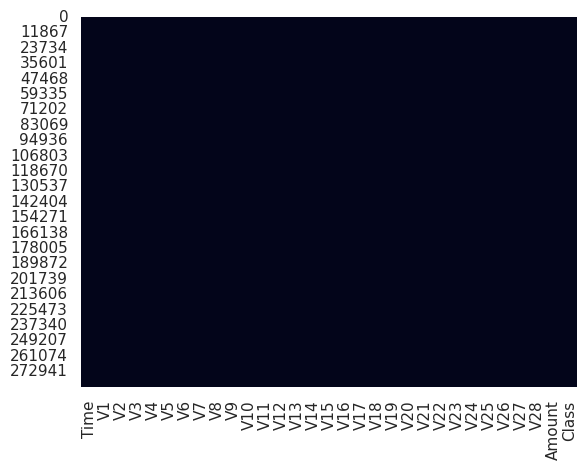

In [60]:
# Visualise the missing values with the seaborn heatmap
sns.heatmap(crecard_df.isnull(), cbar=False)

The above heatmap indicates that there are no missing values in our dataset. Maybe this library could not capture the missing values for us so we will explore further by using a matrix.

<Axes: >

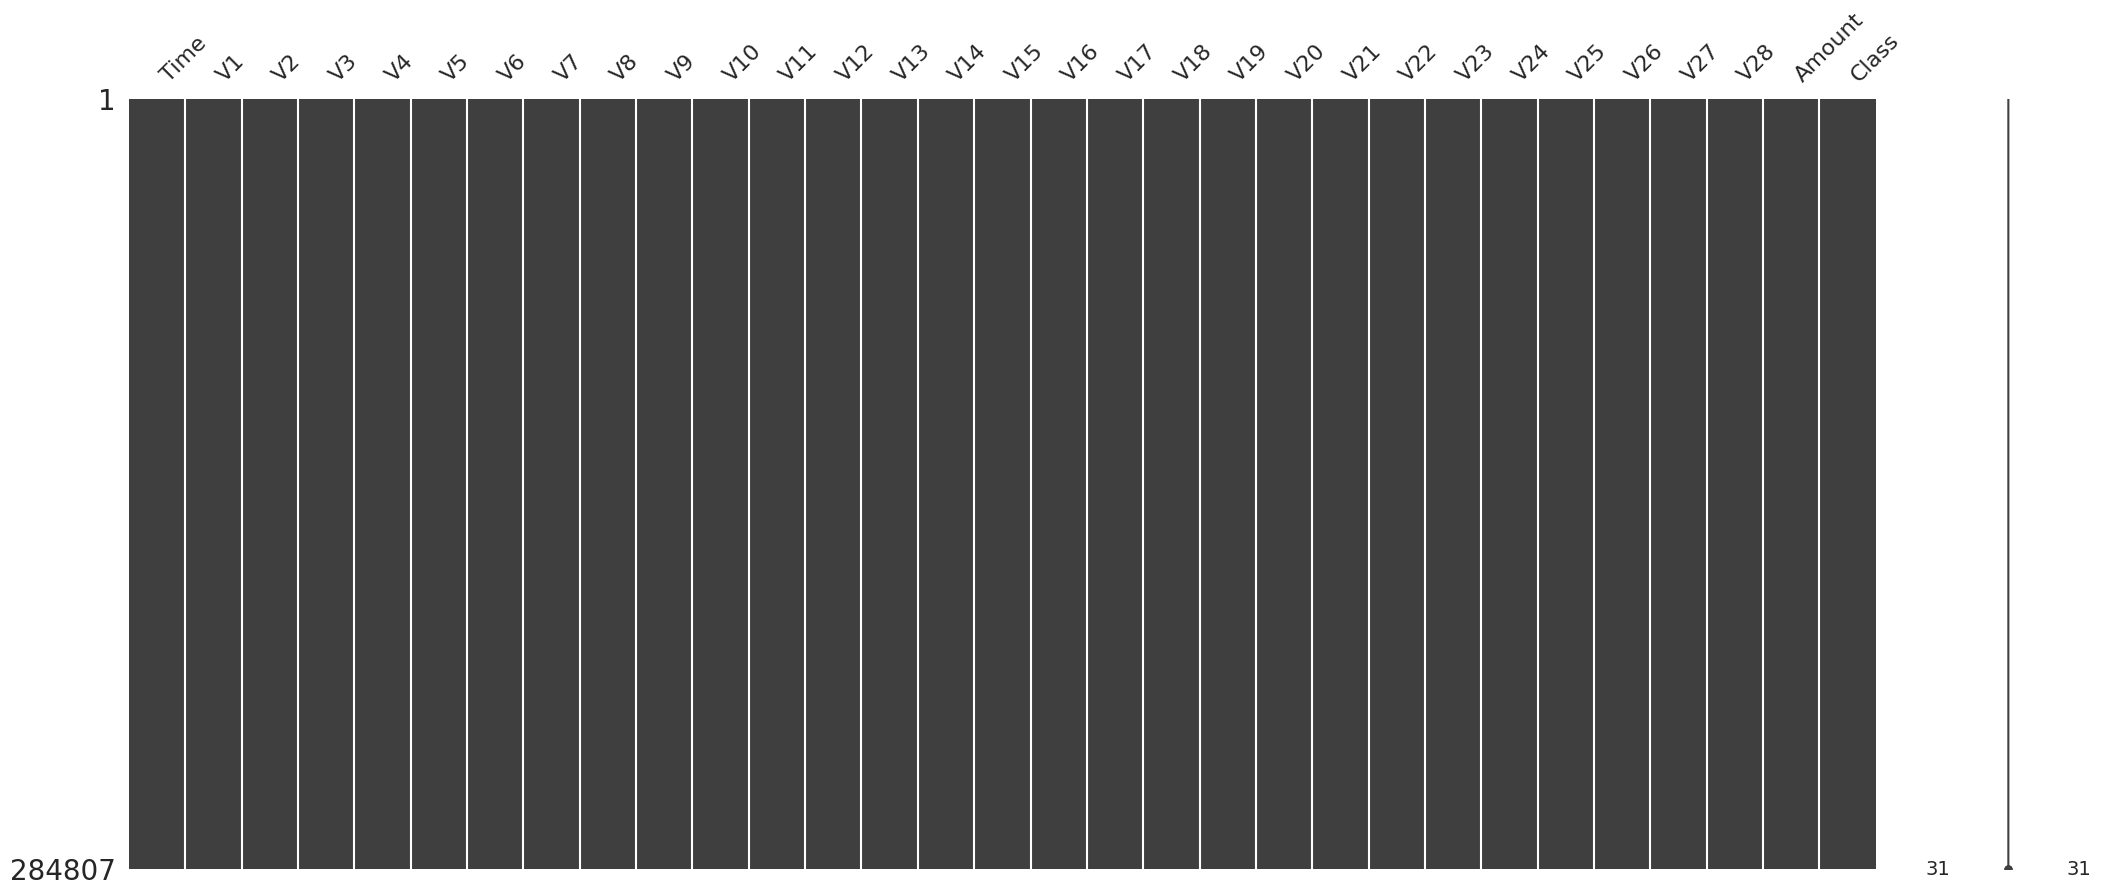

In [61]:
# Visualise the missing values with the missingno matrix
msno.matrix(crecard_df)

Again, we can observe that all our data are present without any missing values. Let's use the **missingno bar plot** to test this further.

<Axes: >

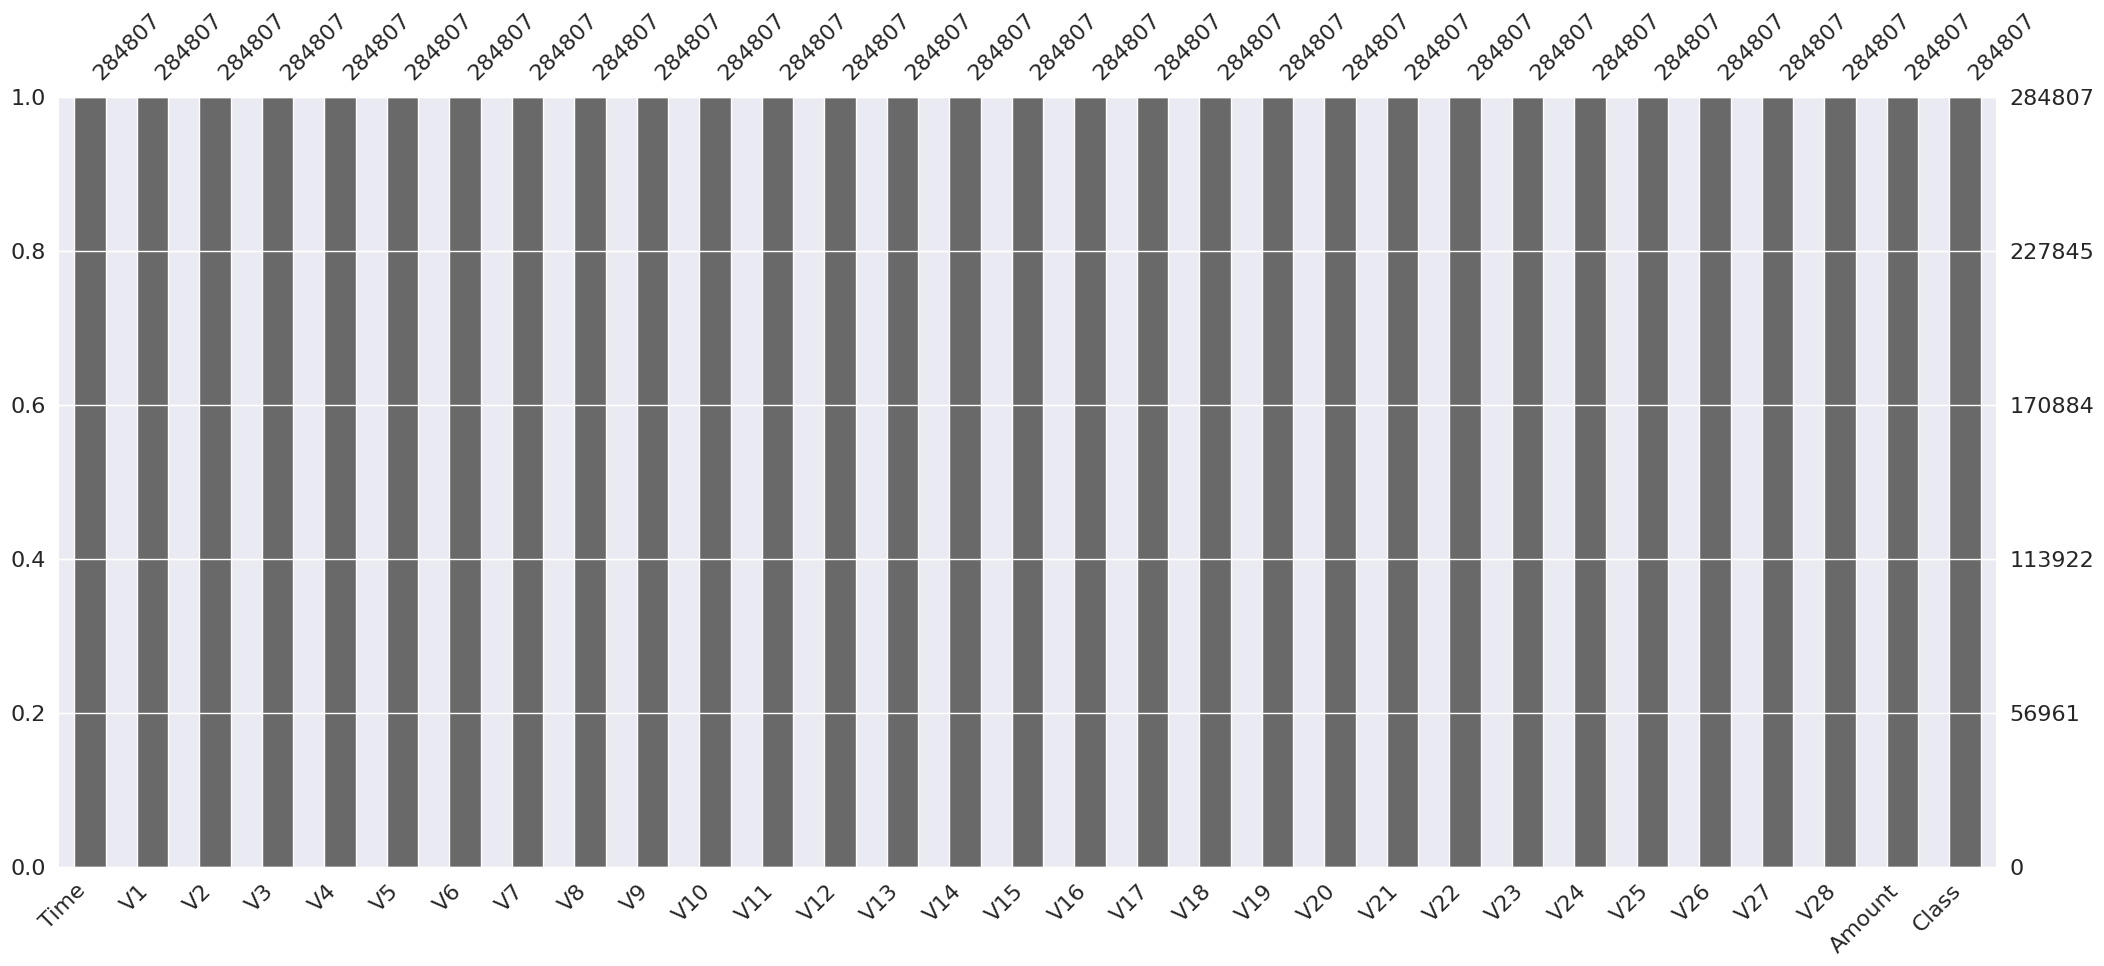

In [62]:
# Visualise the missing values with the missingno bar plot
msno.bar(crecard_df)

Here, we can see that all the **thirty-one variables** have all **284807 observations** present without any value missing.

In [63]:
# Checking the percentage of NaN values present in each feature
# Making a list of features which has missing values

features_with_na = [features for features in crecard_df.columns if crecard_df[features].isnull().sum() >1]
#the feature name and the ercentage of the missing values 

for feature in features_with_na:
    print(feature, np.round(crecard_df[feature].isnull().mean(), 4), ' % missing values')

Checking the percentages of our missing values

In [71]:
percent_null_columns = pd.DataFrame({
    'Columns': crecard_df.isna().sum().index,
    'No. Null values': crecard_df.isna().sum().values,
    'Percentage': crecard_df.isna().sum().values/crecard_df.shape[0]
})
percent_null_columns

,Columns,No. Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [73]:
crecard_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

### Checking fraud percentage
Here, we will explore the total fraud transaction done in our dataset and those which are not fraudulent in percentages.

In [79]:
non_fraud_count = 0
non_fraud = crecard_df['Class']
for i in range(len(non_fraud)):
  if non_fraud[i]==0:
    non_fraud_count = non_fraud_count + 1

non_fraud_count

284315

A total of **284315 transacion** were not fraudulent. Now let us calculate the non-fraudulent percentages. Thus, the total out of 100 which were not fraudulent. 

In [81]:
non_fraud_percent = (non_fraud_count/len(non_fraud)) * 100
print(f"The percentage of total transactions not fraud: {non_fraud_percent}")

The percentage of total transactions not fraud: 99.82725143693798
